# Import Libraries and dataset


In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');


In [3]:
dataset=pd.read_csv('census_income.csv')
dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['Income'] = labelEncoder.fit_transform(dataset['Income'])

# Exploratory Data Analysis and Data Processing


In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [6]:
dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

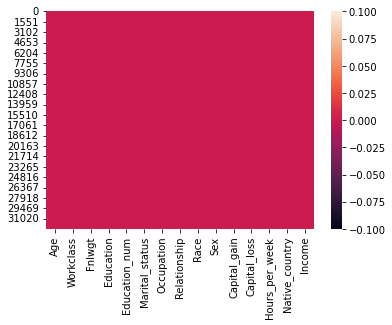

In [7]:
sns.heatmap(dataset.isnull())

# Data Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

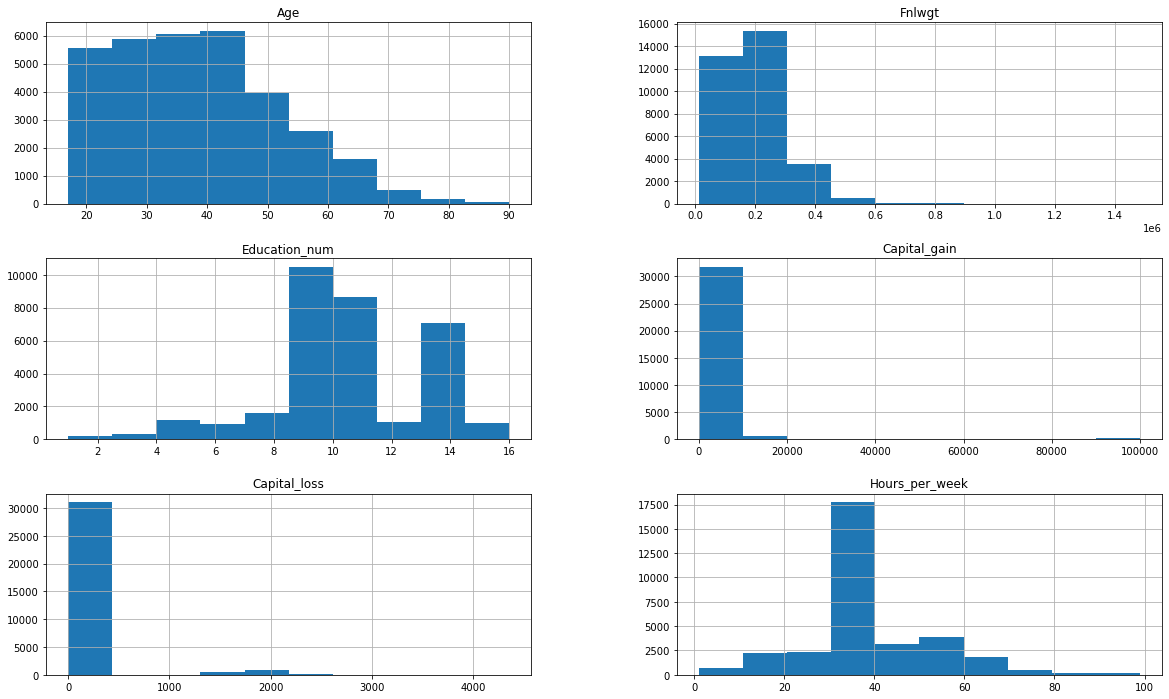

In [9]:
rcParams['figure.figsize'] = 20, 12
dataset[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].hist()

# Data Correlation

In [18]:
dataset.corr()

,Education_num,Income
Education_num,1.000000,0.335182
Income,0.335182,1.000000


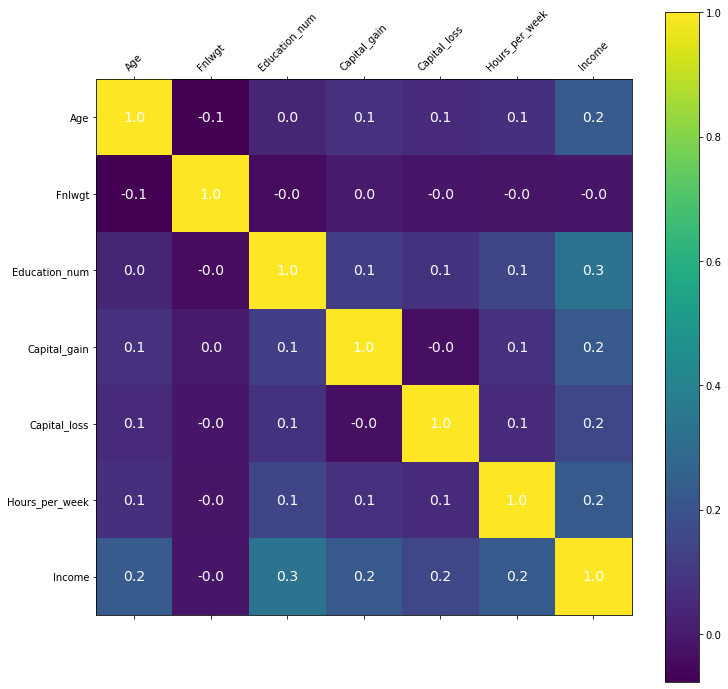

In [11]:
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values) 
for (i, j), corr in np.ndenumerate(dataset.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

# categorical features using CountPlot.



<AxesSubplot:xlabel='Age', ylabel='count'>

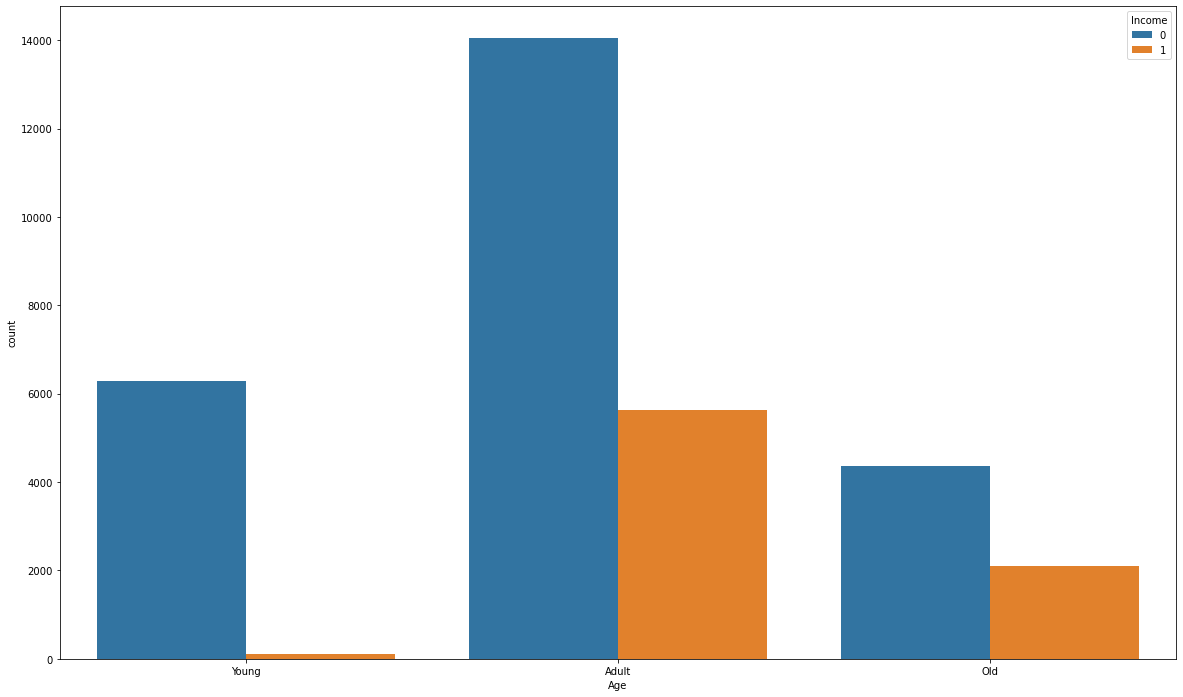

In [12]:
dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])            
sns.countplot(x = 'Age', hue = 'Income', data = dataset)


# Capital Gain and Capital Loss


<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

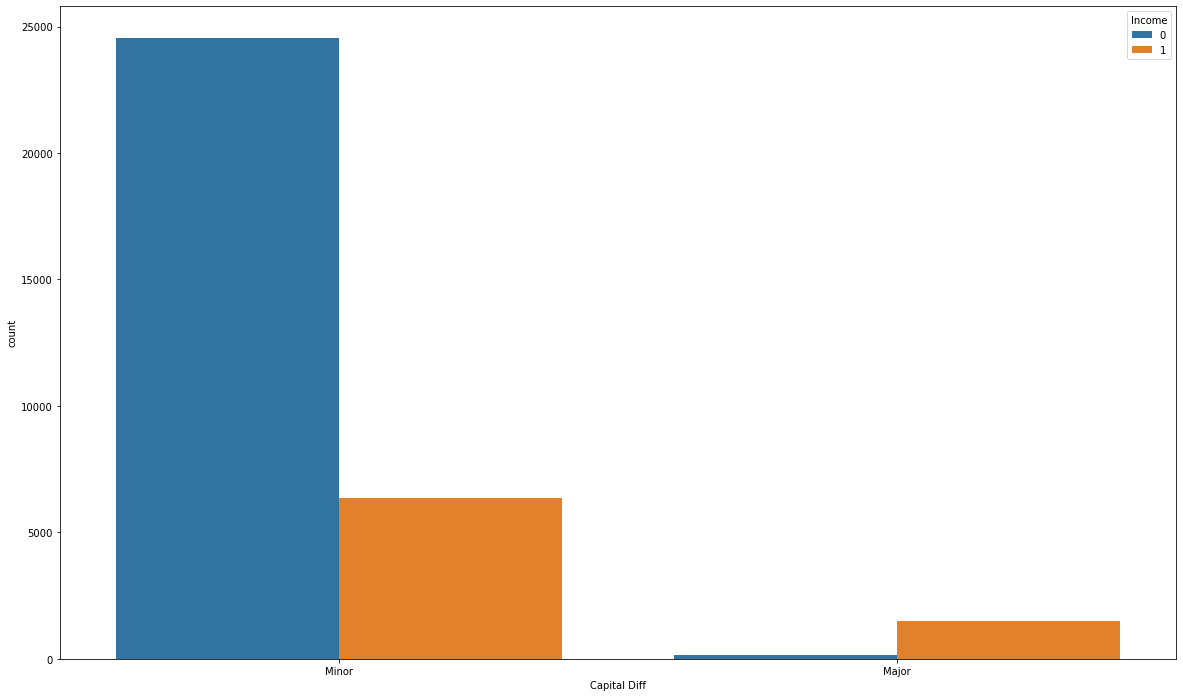

In [13]:
dataset['Capital Diff'] = dataset['Capital_gain'] - dataset['Capital_loss']
dataset.drop(['Capital_gain'], axis = 1, inplace = True)
dataset.drop(['Capital_loss'], axis = 1, inplace = True)
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = dataset)



# Final Weight


In [ ]:
dataset.drop(['Fnlwgt'], axis = 1, inplace = True)


# Hours per Week


<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

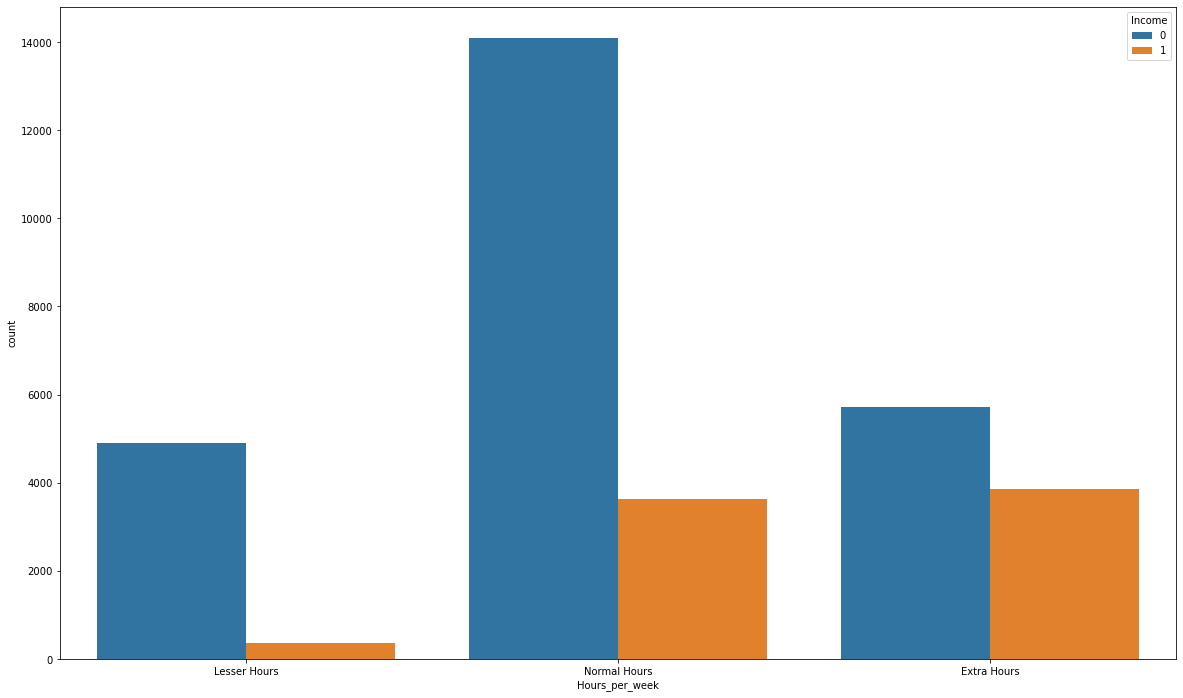

In [17]:
dataset['Hours_per_week'] = pd.cut(dataset['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'Hours_per_week', hue = 'Income', data = dataset)


# Work Class


<AxesSubplot:xlabel='Workclass', ylabel='count'>

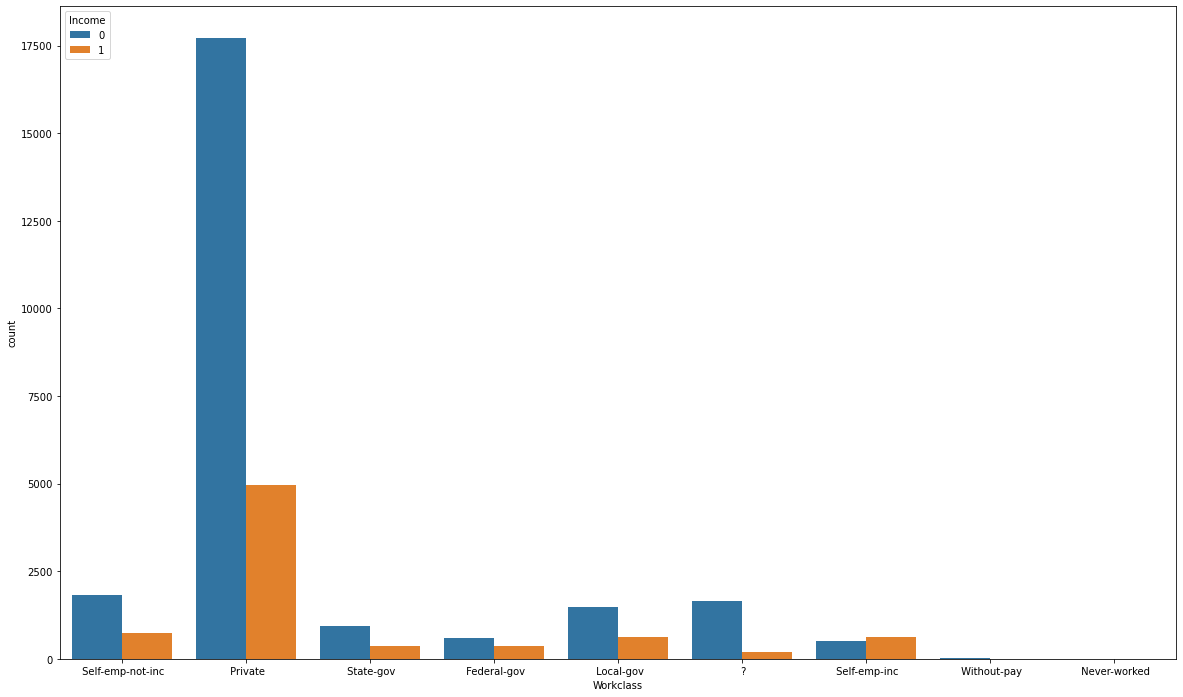

In [20]:
sns.countplot(x = 'Workclass', hue = 'Income', data = dataset)


In [21]:
dataset = dataset.drop(dataset[dataset['Workclass'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['Workclass'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['Workclass'] == ' Never-worked'].index)


# Education and Education Number


<AxesSubplot:xlabel='Education', ylabel='count'>

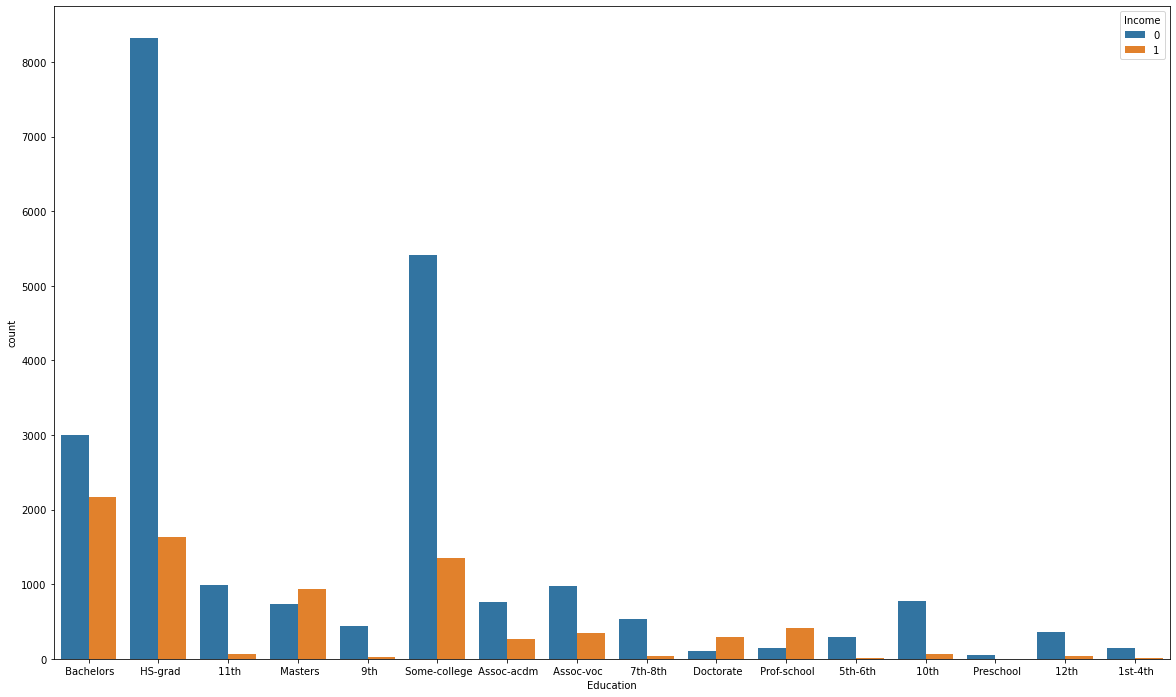

In [22]:
sns.countplot(x = 'Education', hue = 'Income', data = dataset)


In [23]:
education_classes = dataset['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, dataset[dataset['Education'] == edu_class]['Education_num'].unique()))



For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


In [24]:
dataset.drop(['Education_num'], axis = 1, inplace = True)
dataset['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['Education'].value_counts()


 HS-grad         9959
 Some-college    6772
 Bachelors       5181
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

# Marital Status and Relationship


In [26]:
dataset['Marital_status'].value_counts()


 Married-civ-spouse       14331
 Never-married             9907
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [27]:
dataset['Relationship'].value_counts()


 Husband           12700
 Not-in-family      7864
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

# Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

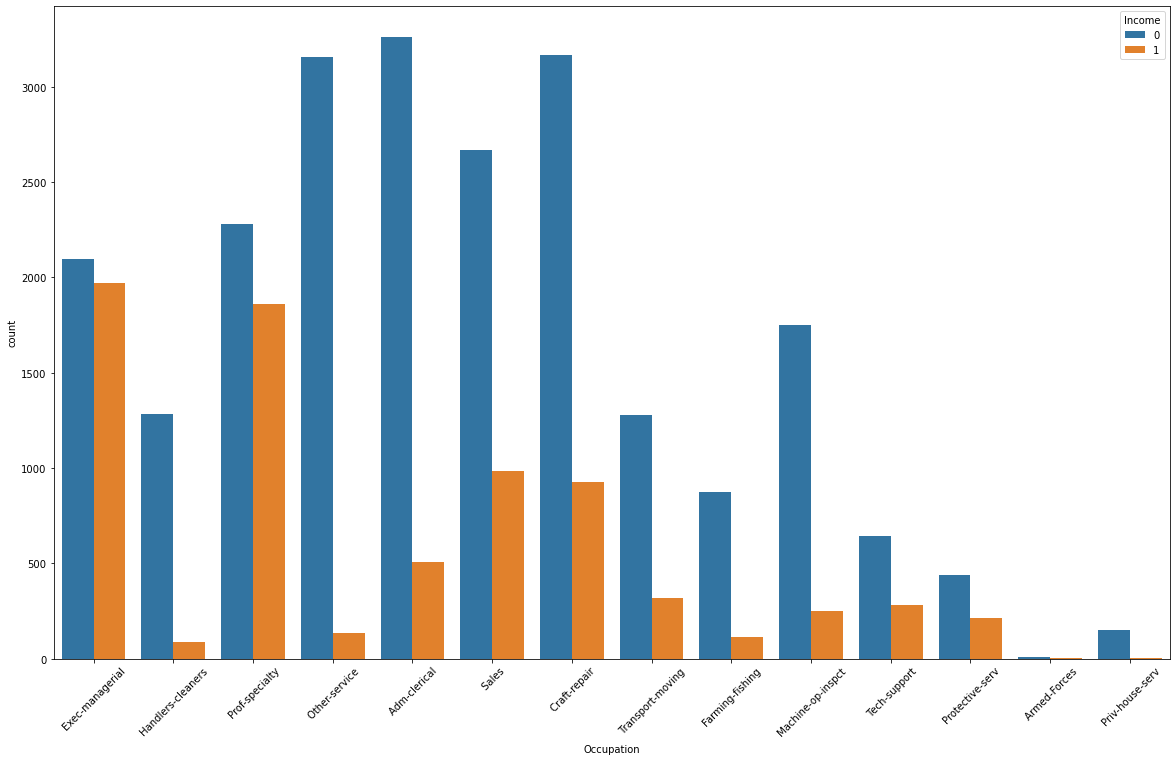

In [28]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = dataset)


# Race

<AxesSubplot:xlabel='Race', ylabel='count'>

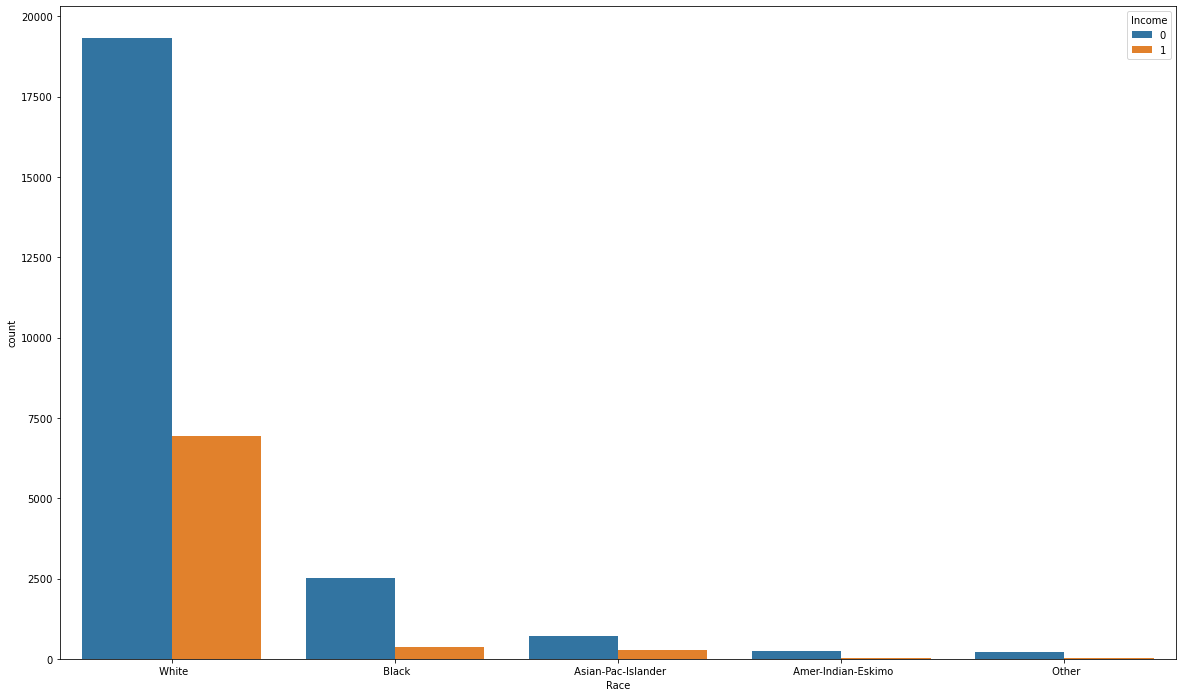

In [29]:
sns.countplot(x = 'Race', hue = 'Income', data = dataset)


In [30]:
dataset['Race'].unique()
dataset['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)


# Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

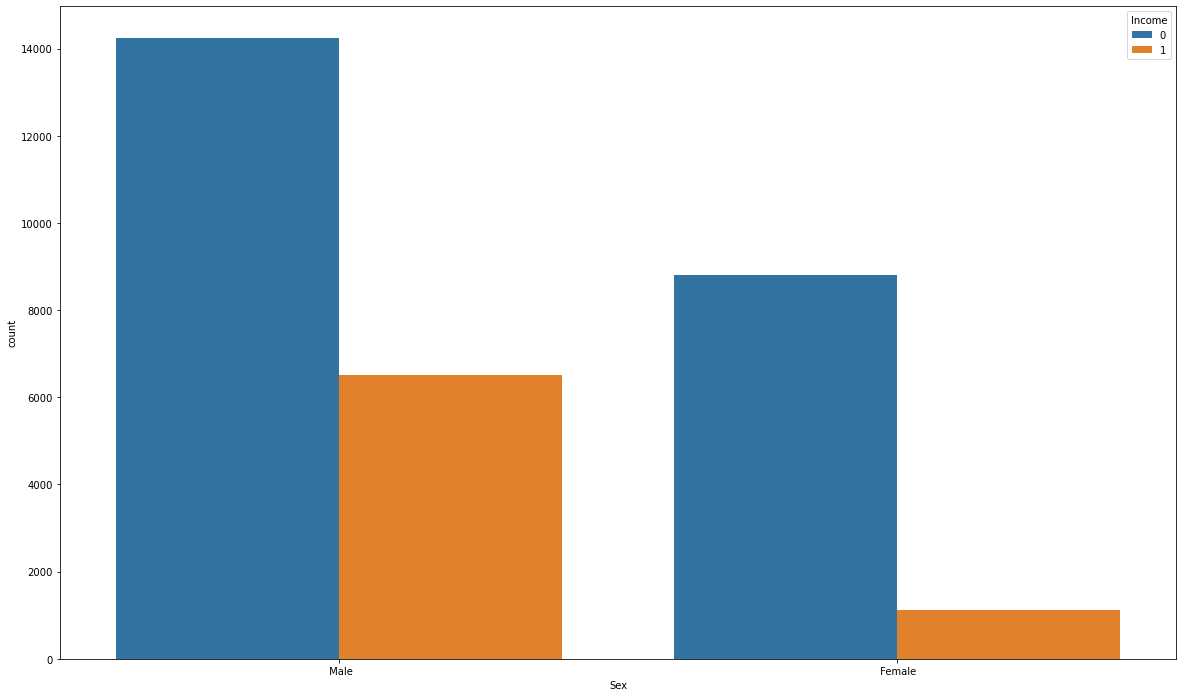

In [31]:
sns.countplot(x = 'Sex', hue = 'Income', data = dataset)


# Native_country

In [34]:
country_count = dataset['Native_country'].value_counts()
country_count


 United-States                 27490
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Text(0.5, 1.0, 'Total adults from each Country')

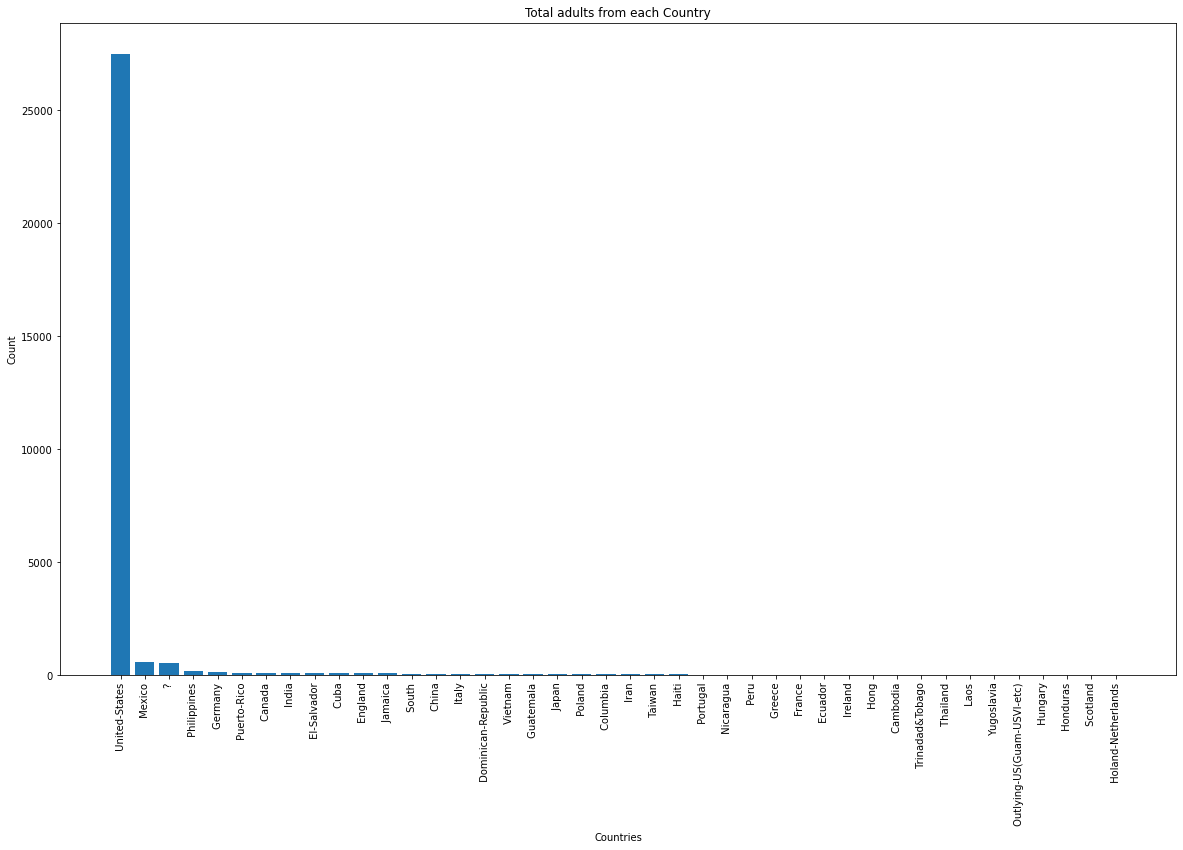

In [35]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')


In [36]:
dataset = dataset.drop(dataset[dataset['Native_country'] == ' ?'].index)


In [37]:
countries = np.array(dataset['Native_country'].unique())
countries = np.delete(countries, 0)


In [38]:
dataset['Native_country'].replace(countries, 'Other', inplace = True)


<AxesSubplot:xlabel='count', ylabel='Native_country'>

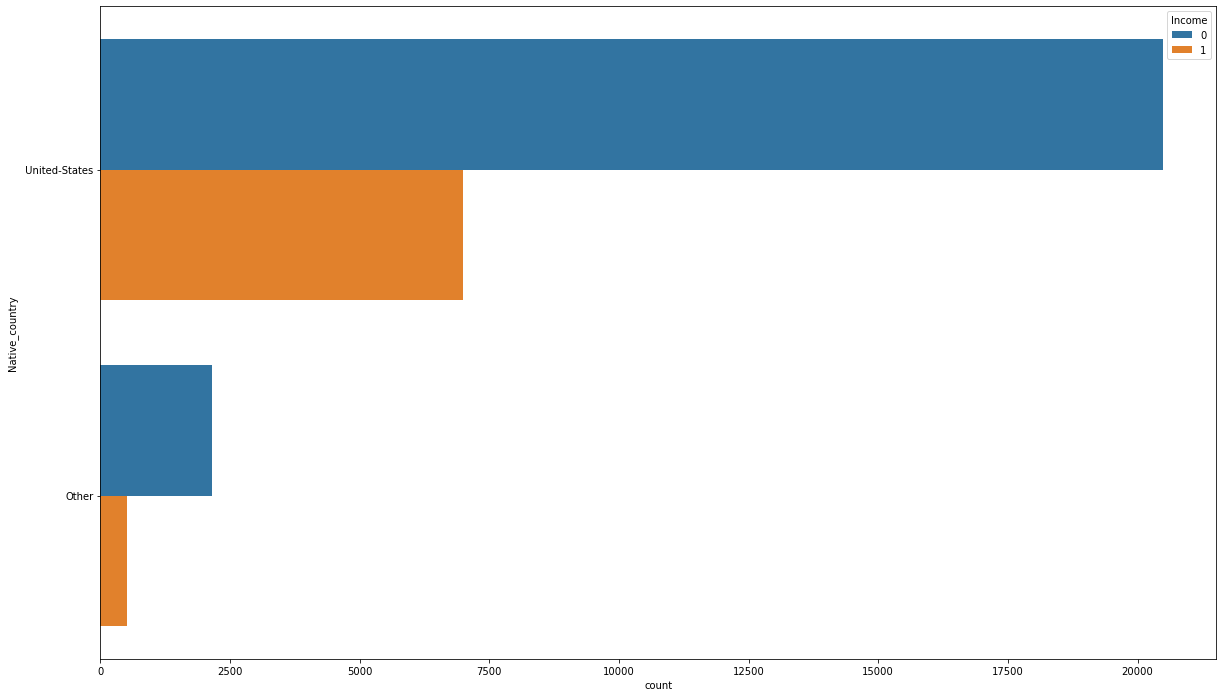

In [39]:
sns.countplot(y = 'Native_country', hue = 'Income', data = dataset)


# Data Manipulation


In [40]:
y = dataset['Income']
X = dataset.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))


Total features: 56


# Separating the data into X and Y

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [42]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [43]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [49]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.68
Support Vector Classifier:
F1 score: 0.65
Decision Tree Classifier:
F1 score: 0.62
Random Forest Classifier:
F1 score: 0.64
Gradient Boosting Classifier:
F1 score: 0.64


# Analysing Results


# Accuracy Plot


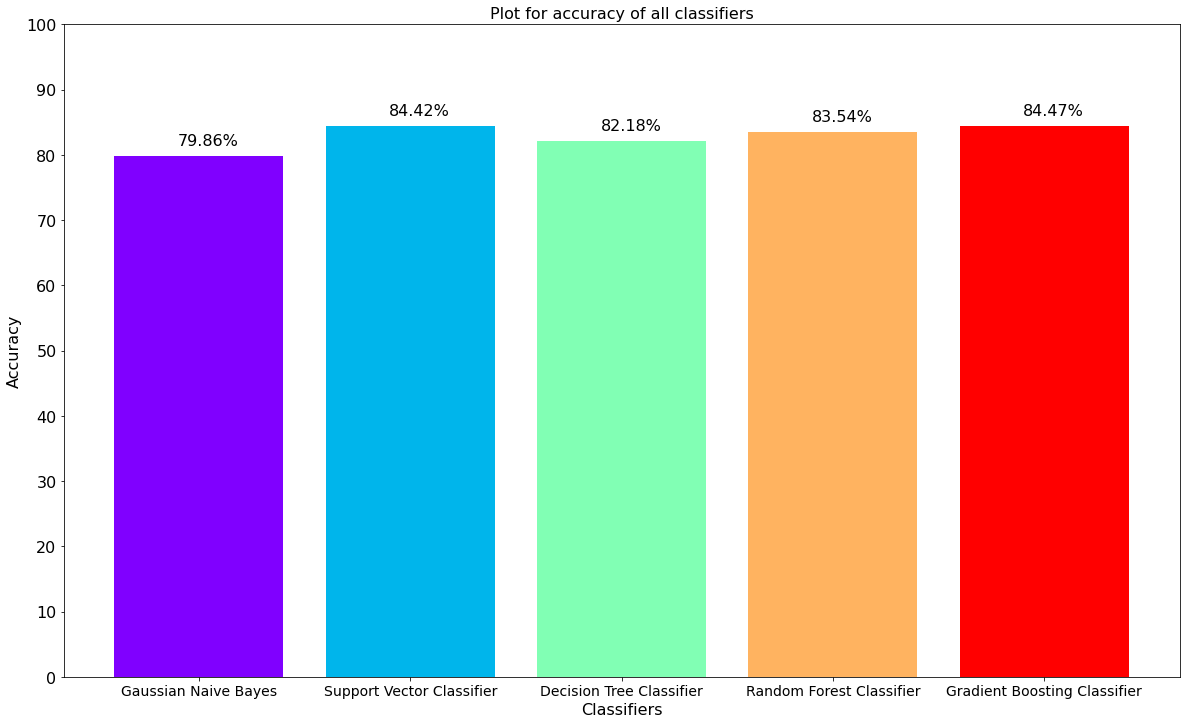

In [48]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)


# ROC Curve


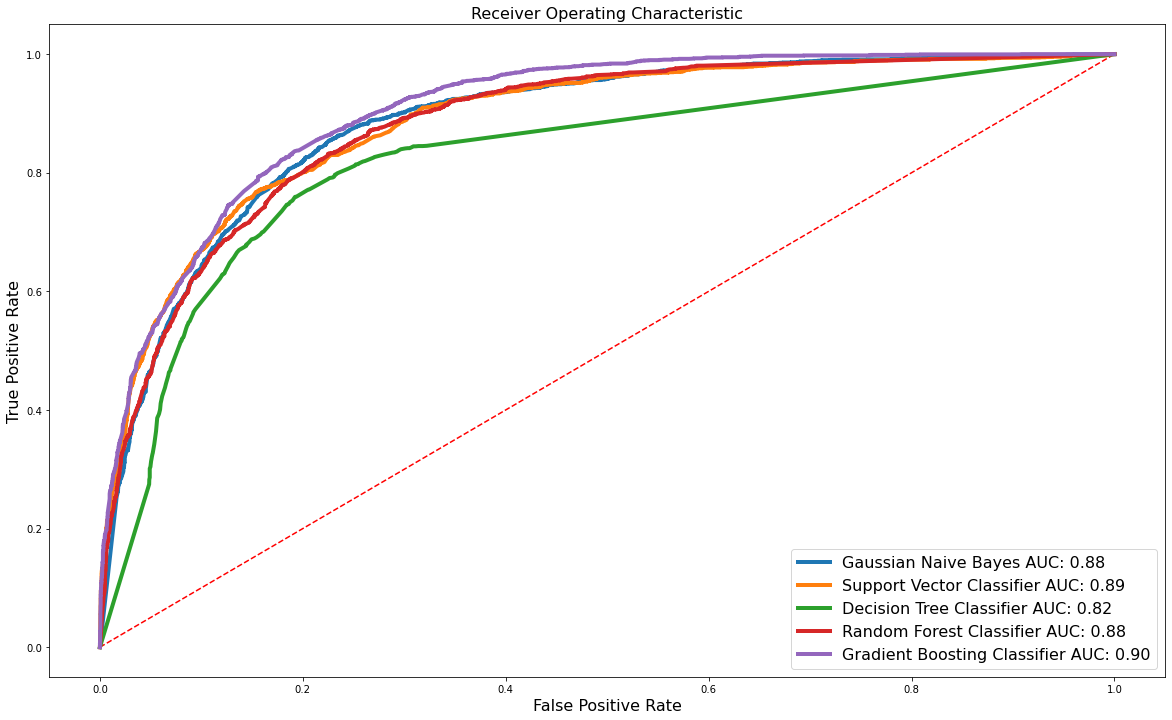

In [47]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


Again, Gradient Boosting Classifier has the maximum Area Under Curve with a value of 0.90.

# Saving model in pickle format


In [50]:
gbc=GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(format(f1_score(y_test, y_pred)))
accuracy = accuracy_score(y_test, y_pred)*100

0.6447534766118838


In [51]:
import joblib
joblib.dump(gbc,"CensusIncome.pkl")


['CensusIncome.pkl']